### 정규화
- 표준화와 정규화는 데이터의 척도(scale)를 변환하는 기법
- 다양한 측정 단위의 데이터를 동일한 기준으로 비교하거나 분석하기 위해 사용
- 종류 :
> **Min*-Max 정규화 (Min-Max Normalization)**,  
> **Z-점수 정규화 (Z-score Normalization or Standardization)**,   
Max-Abs 정규화 (Max-Abs Normalization)   
...

- MinMax 정규화 vs Z-점수 정규화의 선택
> - 두 방법 모두 데이터의 스케일을 조정하여 학습 과정을 안정시키고, 모델의 성능을 향상
> - MinMax정규화는 데이터가 특정 범위 내에 있어야 하는 경우, 또는 특성이 서로 다른 스케일을 가지는 경우에 유용
예를 들어, 이미지 데이터에서 픽셀 값은 일반적으로 [0, 255] 범위를 가지므로, [0, 1] 범위로 정규화하면 신경망 학습이 더 효과적
> - Z-점수 정규화(표준화)는 데이터가 정규 분포를 따르도록 변환해야 하는 경우나, 이상치가 많은 경우에 유용
예를 들어 선형 회귀, 로지스틱 회귀, SVM과 같은 모델에서 특히 효과적

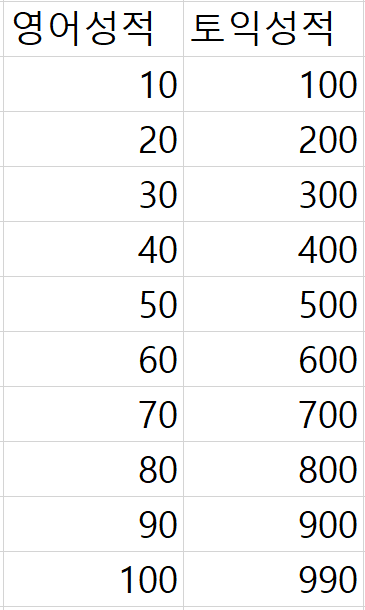

### Min-Max Scaling 정규화
- 데이터의 최소값과 최대값을 사용하여 데이터의 값을 특정 범위(일반적으로 [0, 1])로 변환하는 기법

- 방법($\mu$는 평균,  $\sigma$는 표준편차)
#####$$X_{\text{new}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

- 장점: 값의 스케일을 통일해주어 모델 학습 시 특정 특징이 과도하게 영향을 미치는 것을 방지
- 단점: 이상치(outlier)에 민감
- 적용사례 : 이미지 처리, 신경망과 --> 범위가 중요한 경우

In [12]:
import numpy as np

X = np.array([[10, 100],
              [20, 200],
              [30, 300],
              [40, 400],
              [50, 500],
              [60, 600],
              [70, 700],
              [80, 800],
              [90, 900],
              [100, 990]])

X = (X - np.min(X)) / (np.max(X) - np.min(X))

X

array([[0.        , 0.09183673],
       [0.01020408, 0.19387755],
       [0.02040816, 0.29591837],
       [0.03061224, 0.39795918],
       [0.04081633, 0.5       ],
       [0.05102041, 0.60204082],
       [0.06122449, 0.70408163],
       [0.07142857, 0.80612245],
       [0.08163265, 0.90816327],
       [0.09183673, 1.        ]])

In [24]:
# 사이킷런의 MinMaxScaler함수를 활용해서
from sklearn.preprocessing import MinMaxScaler

X = np.array([[10, 100],
              [20, 200],
              [30, 300],
              [40, 400],
              [50, 500],
              [60, 600],
              [70, 700],
              [80, 800],
              [90, 900],
              [100, 990]])

scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X)

X_minmax

array([[0.        , 0.        ],
       [0.11111111, 0.11235955],
       [0.22222222, 0.2247191 ],
       [0.33333333, 0.33707865],
       [0.44444444, 0.4494382 ],
       [0.55555556, 0.56179775],
       [0.66666667, 0.6741573 ],
       [0.77777778, 0.78651685],
       [0.88888889, 0.8988764 ],
       [1.        , 1.        ]])

### Z-Score 정규화(=표준화Standardization, 정규화라고 하기보다 표준화라고 부름)
- 데이터의 평균을 0, 표준편차를 1로 변환하여 데이터의 값을 표준 정규 분포로 만드는 기법

- 방법($\mu$는 평균,  $\sigma$는 표준편차)
#####$$Z = \frac{X - \mu}{\sigma}$$

- 장점: 이상치에 상대적으로 덜 민감
- 단점: 데이터가 정규 분포를 따를 때 효과적
- 적용사례 : 선형회귀, 로지스틱회귀 --> 거리가 중요한 경우

In [26]:
import numpy as np

X = np.array([[10, 100],
              [20, 200],
              [30, 300],
              [40, 400],
              [50, 500],
              [60, 600],
              [70, 700],
              [80, 800],
              [90, 900],
              [100, 1000]])


Z = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

Z

array([[-1.5666989 , -1.5666989 ],
       [-1.21854359, -1.21854359],
       [-0.87038828, -0.87038828],
       [-0.52223297, -0.52223297],
       [-0.17407766, -0.17407766],
       [ 0.17407766,  0.17407766],
       [ 0.52223297,  0.52223297],
       [ 0.87038828,  0.87038828],
       [ 1.21854359,  1.21854359],
       [ 1.5666989 ,  1.5666989 ]])

In [28]:
print(np.mean(Z, axis=0))
print(np.std(Z, axis=0))

[-1.11022302e-16 -4.44089210e-17]
[1. 1.]


In [31]:
# 사이킷런의 StandardScaler함수를 활용해서
from sklearn.preprocessing import StandardScaler

X = np.array([[10, 100],
              [20, 200],
              [30, 300],
              [40, 400],
              [50, 500],
              [60, 600],
              [70, 700],
              [80, 800],
              [90, 900],
              [100, 1000]])

scaler = StandardScaler()
Z = scaler.fit_transform(X)

Z

array([[-1.5666989 , -1.5666989 ],
       [-1.21854359, -1.21854359],
       [-0.87038828, -0.87038828],
       [-0.52223297, -0.52223297],
       [-0.17407766, -0.17407766],
       [ 0.17407766,  0.17407766],
       [ 0.52223297,  0.52223297],
       [ 0.87038828,  0.87038828],
       [ 1.21854359,  1.21854359],
       [ 1.5666989 ,  1.5666989 ]])

### 정규화 안함 vs 정규화 함

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import keras

fish = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/Fish_tiny.csv")

fish

,길이,높이,너비,무게
0,23.2,11.5200,4.0200,242.0
1,24.0,12.4800,4.3056,290.0
2,23.9,12.3778,4.6961,340.0
3,26.3,12.7300,4.4555,363.0
4,26.5,12.4440,5.1340,430.0
5,26.8,13.6024,4.9274,450.0
6,26.8,14.1795,5.2785,500.0
7,27.6,12.6700,4.6900,390.0
8,27.6,14.0049,4.8438,450.0
9,28.5,14.2266,4.9594,500.0


#### 정규화 안함.

Epoch 1/1000
1/1 [==============================] - 1s 671ms/step - loss: 256144.6562
Epoch 2/1000
1/1 [==============================] - 0s 13ms/step - loss: 255046.8750
Epoch 3/1000
1/1 [==============================] - 0s 12ms/step - loss: 253957.0469
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 252889.1562
Epoch 5/1000
1/1 [==============================] - 0s 17ms/step - loss: 251861.7812
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 250841.6250
Epoch 7/1000
1/1 [==============================] - 0s 14ms/step - loss: 249827.8438
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 248820.9688
Epoch 9/1000
1/1 [==============================] - 0s 14ms/step - loss: 247830.7031
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 246865.8750
Epoch 11/1000
1/1 [==============================] - 0s 12ms/step - loss: 245913.4219
Epoch 12/1000
1/1 [==============================] - 0s 13ms/s

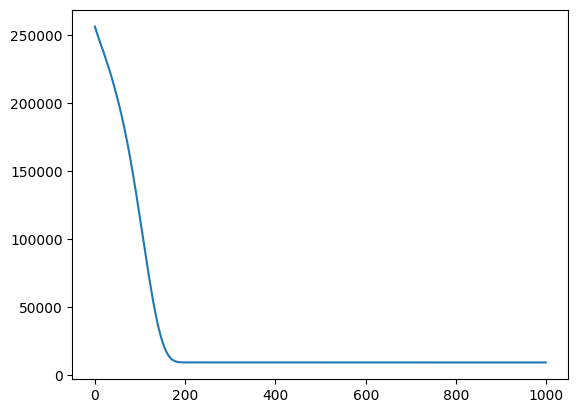

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import keras

fish = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/Fish_tiny.csv")

x = fish[['길이', '높이', '너비']]
y = fish['무게']

# 특징 스케일링
# scaler = StandardScaler()
# x = scaler.fit_transform(x)

# 모델 구축
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(3, )))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

# 모델 컴파일
model.compile(loss='mse', optimizer='adam')

# 모델 훈련
history = model.fit(x, y, epochs=1000)

# 훈련 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.show()

#### 정규화 함.

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 248094.5312
Epoch 2/1000
1/1 [==============================] - 0s 23ms/step - loss: 248047.0938
Epoch 3/1000
1/1 [==============================] - 0s 24ms/step - loss: 247999.2031
Epoch 4/1000
1/1 [==============================] - 0s 19ms/step - loss: 247950.5938
Epoch 5/1000
1/1 [==============================] - 0s 22ms/step - loss: 247901.2031
Epoch 6/1000
1/1 [==============================] - 0s 19ms/step - loss: 247850.9688
Epoch 7/1000
1/1 [==============================] - 0s 22ms/step - loss: 247800.2969
Epoch 8/1000
1/1 [==============================] - 0s 20ms/step - loss: 247749.2031
Epoch 9/1000
1/1 [==============================] - 0s 23ms/step - loss: 247697.5938
Epoch 10/1000
1/1 [==============================] - 0s 23ms/step - loss: 247645.6562
Epoch 11/1000
1/1 [==============================] - 0s 21ms/step - loss: 247593.2969
Epoch 12/1000
1/1 [==============================] - 0s 21ms/step

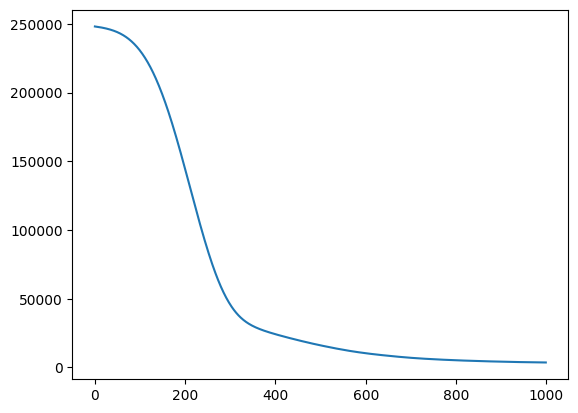

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import keras

fish = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/Fish_tiny.csv")

x = fish[['길이', '높이', '너비']]
y = fish['무게']

# 특징 스케일링
scaler = StandardScaler()
x = scaler.fit_transform(x)

# 모델 구축
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(3, )))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1))

# 모델 컴파일
model.compile(loss='mse', optimizer='adam')

# 모델 훈련
history = model.fit(x, y, epochs=1000)

# 훈련 과정 시각화
plt.plot(history.history['loss'], label='Train Loss')
plt.show()

### 펭균 종 분류 모델 : 실전에 더 가까운 데이터 활용
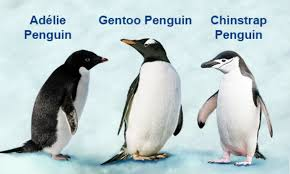

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import keras

penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


```
species: 펭귄의 종(Adélie, Gentoo, Chinstrap)
island: 펭귄이 발견된 섬(Biscoe, Dream, Torgersen)
bill_length_mm: 부리의 길이(밀리미터)
bill_depth_mm: 부리의 깊이(밀리미터)
flipper_length_mm: 날개의 길이(밀리미터)
body_mass_g: 몸무게(그램)
sex: 펭귄의 성별
```



#### 데이터 살펴보기

In [4]:
# 데이터 프레임의 정보 보기 -
# 데이터는 몇개인가?, 자료형이 숫자인가?, 결측치가 있는가? 등을 살펴본다.

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [36]:
# 펭균 데이터의 편향성 확인

penguins['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

#### 결측치 추출

In [65]:
# 결측치가 있는 모든 행

penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins[penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [5]:
# 특정 열이 결측치인 행만 추출

penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins[penguins['bill_length_mm'].isna()]   # penguins 데이터프레임의 'bill_length_mm'열이 NaN인 행

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


#### 결측치 삭제

In [6]:
# 결측치가 있는 모든 행 삭제
penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins = penguins.dropna()

penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [7]:
# 특정 열에 결측치가 있을 경우 해당 행을 삭제하고 싶을 때,

penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins_1 = penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'])     # 'bill_length_mm'나 'bill_depth_mm'가 NaN인 행을 삭제하고 싶을 때

penguins_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


#### 범주형 문자 데이터를 숫자로...(섬이름, 성별)

In [12]:
penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins = penguins.dropna() # 결측치가 있는 모든 행 삭제

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [15]:
# 성별을 숫자로 : MALE : 1, FEMALE : 0

penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins = penguins.dropna() # 결측치가 있는 모든 행 삭제

penguins['sex'] = penguins['sex'].replace({'MALE': 0, 'FEMALE': 1}) # <--------------------------

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,1


In [16]:
# 성별을 숫자로 바꾼 컬럼을 새로 추가하고 싶을 때 : MALE : 1, FEMALE : 0

penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins = penguins.dropna() # 결측치가 있는 모든 행 삭제

penguins['숫자성별'] = penguins['sex'].replace({'MALE': 0, 'FEMALE': 1}) # <--------------------------

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,숫자성별
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE,1
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE,1
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE,0
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE,1


In [20]:
# 발견된 섬을 숫자로 숫자로 : MALE : 1, FEMALE : 0

penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins = penguins.dropna() # 결측치가 있는 모든 행 삭제

penguins['sex'] = penguins['sex'].replace({'MALE': 0, 'FEMALE': 1})
penguins['island'] = penguins['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream' : 2}) # <--------------------------

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,0
1,Adelie,0,39.5,17.4,186.0,3800.0,1
2,Adelie,0,40.3,18.0,195.0,3250.0,1
4,Adelie,0,36.7,19.3,193.0,3450.0,1
5,Adelie,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,1,47.2,13.7,214.0,4925.0,1
340,Gentoo,1,46.8,14.3,215.0,4850.0,1
341,Gentoo,1,50.4,15.7,222.0,5750.0,0
342,Gentoo,1,45.2,14.8,212.0,5200.0,1


In [21]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 20.8+ KB


#### 데이터 독립변수와 종속변수로 분리하기

In [22]:
penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins = penguins.dropna() # 결측치 제거

penguins['sex'] = penguins['sex'].replace({'MALE': 0, 'FEMALE': 1})  # 성별 숫자로
penguins['island'] = penguins['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream' : 2}) # 발견된 섬 숫자로

penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,0,39.1,18.7,181.0,3750.0,0
1,Adelie,0,39.5,17.4,186.0,3800.0,1
2,Adelie,0,40.3,18.0,195.0,3250.0,1
4,Adelie,0,36.7,19.3,193.0,3450.0,1
5,Adelie,0,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...,...,...
338,Gentoo,1,47.2,13.7,214.0,4925.0,1
340,Gentoo,1,46.8,14.3,215.0,4850.0,1
341,Gentoo,1,50.4,15.7,222.0,5750.0,0
342,Gentoo,1,45.2,14.8,212.0,5200.0,1


In [23]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [24]:
x = penguins[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]

y = penguins['species']

In [26]:
x.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,0
1,0,39.5,17.4,186.0,3800.0,1
2,0,40.3,18.0,195.0,3250.0,1
4,0,36.7,19.3,193.0,3450.0,1
5,0,39.3,20.6,190.0,3650.0,0


#### One-Hot 인코딩

In [25]:
y = pd.get_dummies(y)

y

,Adelie,Chinstrap,Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
4,True,False,False
5,True,False,False
...,...,...,...
338,False,False,True
340,False,False,True
341,False,False,True
342,False,False,True


#### 모델 만들기

In [40]:
# 표준화 하지 않음.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import keras

# 데이터 가져오기
penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins = penguins.dropna() # 결측치 제거

penguins['sex'] = penguins['sex'].replace({'MALE': 0, 'FEMALE': 1})  # 성별 숫자로
penguins['island'] = penguins['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream' : 2}) # 발견된 섬 숫자로

# 독립변수, 종속변수 분리
x = penguins[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = penguins['species']

# 원-핫 인코딩
y = pd.get_dummies(y)

# 모델 구축
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(6, )))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x, y, epochs=200, validation_split=0.3)

Epoch 1/200
8/8 [==============================] - 1s 54ms/step - loss: 153.3249 - accuracy: 0.2403 - val_loss: 316.1668 - val_accuracy: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 11ms/step - loss: 43.3483 - accuracy: 0.4335 - val_loss: 548.6501 - val_accuracy: 0.0000e+00
Epoch 3/200
8/8 [==============================] - 0s 13ms/step - loss: 46.3737 - accuracy: 0.5193 - val_loss: 510.9665 - val_accuracy: 0.0000e+00
Epoch 4/200
8/8 [==============================] - 0s 15ms/step - loss: 40.5821 - accuracy: 0.4421 - val_loss: 363.8209 - val_accuracy: 0.0000e+00
Epoch 5/200
8/8 [==============================] - 0s 10ms/step - loss: 27.2253 - accuracy: 0.5107 - val_loss: 179.8764 - val_accuracy: 0.0000e+00
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 10.2140 - accuracy: 0.5322 - val_loss: 9.9287e-06 - val_accuracy: 1.0000
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 6.2607 - accuracy: 0.3991 - val_loss: 17.9654 - v

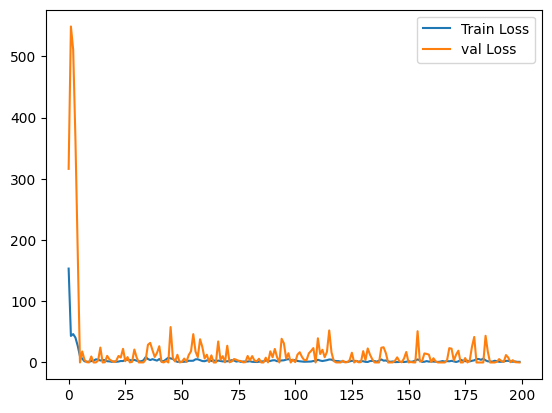

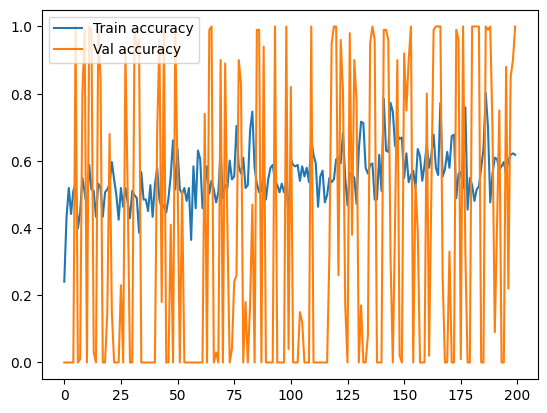

In [41]:
# 훈련 과정 시각화
# loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='val Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.show()

In [42]:
# 표준화 함.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import keras

# 데이터 가져오기
penguins = pd.read_csv("https://raw.githubusercontent.com/ygcho-git/basic_AI_2024/main/data/penguins.csv")

penguins = penguins.dropna() # 결측치 제거

penguins['sex'] = penguins['sex'].replace({'MALE': 0, 'FEMALE': 1})  # 성별 숫자로
penguins['island'] = penguins['island'].replace({'Torgersen': 0, 'Biscoe': 1, 'Dream' : 2}) # 발견된 섬 숫자로

# 독립변수, 종속변수 분리
x = penguins[['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']]
y = penguins['species']

# 독립변수 표준화
scaler = StandardScaler()      # <------------------------- 요기
x = scaler.fit_transform(x)    # <------------------------- 요기

# 원-핫 인코딩
y = pd.get_dummies(y)

# 모델 구축
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(6, )))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x, y, epochs=200, validation_split=0.3)

Epoch 1/200
8/8 [==============================] - 1s 34ms/step - loss: 1.1291 - accuracy: 0.4249 - val_loss: 1.1772 - val_accuracy: 0.0000e+00
Epoch 2/200
8/8 [==============================] - 0s 9ms/step - loss: 0.9704 - accuracy: 0.6094 - val_loss: 1.1393 - val_accuracy: 0.0100
Epoch 3/200
8/8 [==============================] - 0s 7ms/step - loss: 0.8461 - accuracy: 0.6781 - val_loss: 1.1069 - val_accuracy: 0.0400
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 0.7387 - accuracy: 0.7124 - val_loss: 1.0615 - val_accuracy: 0.0700
Epoch 5/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6352 - accuracy: 0.7468 - val_loss: 0.9701 - val_accuracy: 0.2400
Epoch 6/200
8/8 [==============================] - 0s 10ms/step - loss: 0.5419 - accuracy: 0.8155 - val_loss: 0.8604 - val_accuracy: 0.6300
Epoch 7/200
8/8 [==============================] - 0s 10ms/step - loss: 0.4597 - accuracy: 0.9185 - val_loss: 0.7414 - val_accuracy: 0.8600
Epoch 8/200
8/8 [===

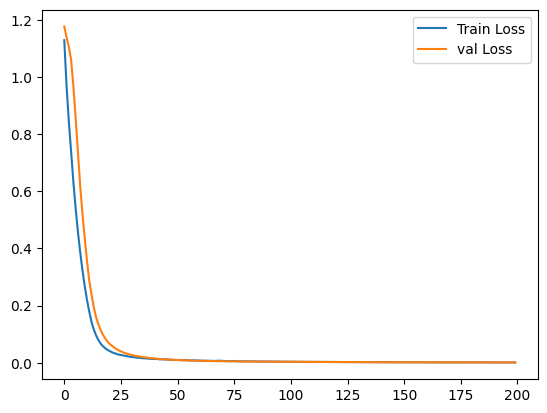

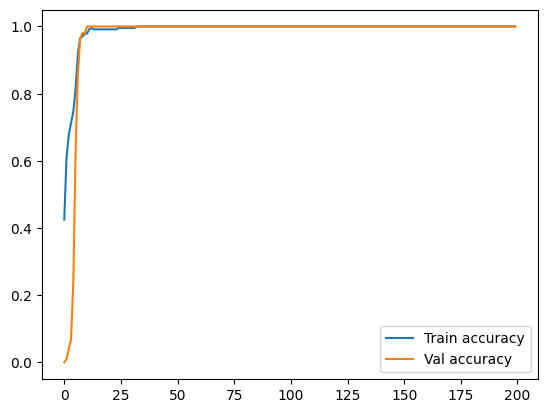

In [43]:
# 훈련 과정 시각화
# loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='val Loss')
plt.legend()
plt.show()

# accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.legend()
plt.show()